In [18]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from utils import *
from plotting import *

In [19]:
matchms_scores = pd.read_csv("../data/output_matching/matchms/matchms_tol_0.0035_1%I_all_peaks_with_0s_only_matching.tsv", sep="\t")
matchms_scores.rename(columns={'CosineHungarian_0.0035_0.0_1.0_scores': 'scores'}, inplace=True)
matchms_scores.rename(columns={'CosineHungarian_0.0035_0.0_1.0_matches': 'matches'}, inplace=True)
matchms_scores = append_classes(matchms_scores, 'query')
merged = append_spectrum_metadata(matchms_scores)

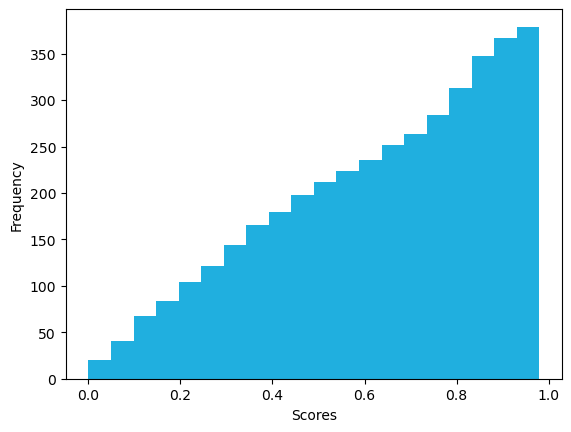

In [20]:
plt.hist(merged['scores'], bins=20,color='#20afdf', cumulative=True)
plt.xlabel('Scores')
plt.ylabel('Frequency')
plt.show()

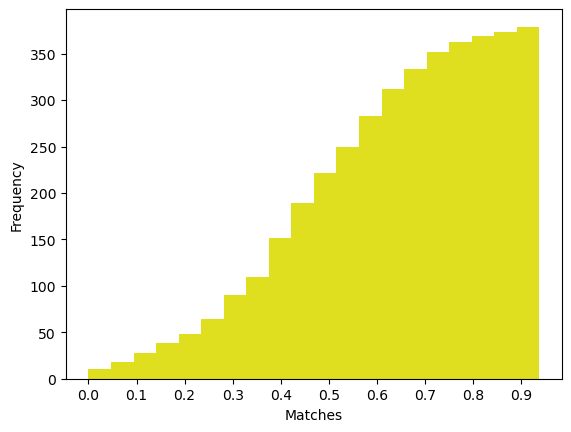

In [21]:
matches_normalized = merged['matches'] / merged['n_peaks_reference']
plt.hist(matches_normalized, bins=20,color='#dfdf20', cumulative=True)
plt.xticks(np.arange(0, 1, 0.1))
plt.xlabel('Matches')
plt.ylabel('Frequency')
plt.show()

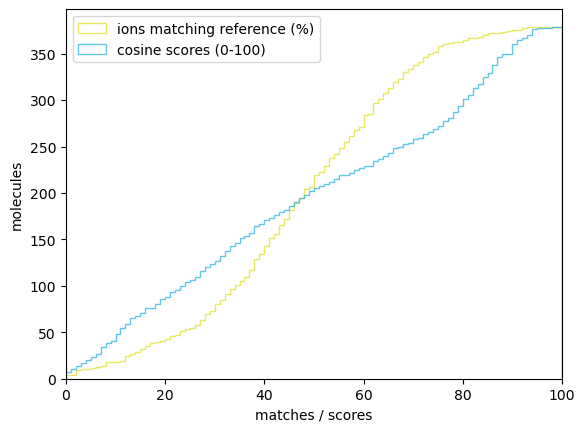

In [22]:
#plt.figure(figsize=(10, 6))

# Plot histogram of matches
plt.hist(matches_normalized * 100, range=[0,100], bins=100, color='#dfdf20', alpha=0.7, label='ions matching reference (%)', cumulative=True, histtype="step")

# Plot histogram of scores
plt.hist(merged['scores'] * 100, range=[0,100], bins=100, color='#20afdf', alpha=0.7, label='cosine scores (0-100)', cumulative=True, histtype="step")

plt.xlabel('matches / scores')
plt.ylabel('molecules')
plt.xlim(0, 100)
plt.legend()
plt.show()

In [23]:
matchms_scores_top5 = pd.read_csv("../data/output_matching/matchms/matchms_tol_0.0035_1%I_top5_with_0s_only_matching.tsv", sep="\t")
matchms_scores_top5.rename(columns={'CosineHungarian_0.0035_0.0_1.0_scores': 'scores'}, inplace=True)
matchms_scores_top5.rename(columns={'CosineHungarian_0.0035_0.0_1.0_matches': 'matches'}, inplace=True)
matchms_scores_top5 = append_classes(matchms_scores_top5, 'query')
merged_top5 = append_spectrum_metadata(matchms_scores_top5)

In [43]:
merged_top5['matches'].value_counts()

matches
2    113
1    100
3     82
0     71
4     11
5      2
Name: count, dtype: int64

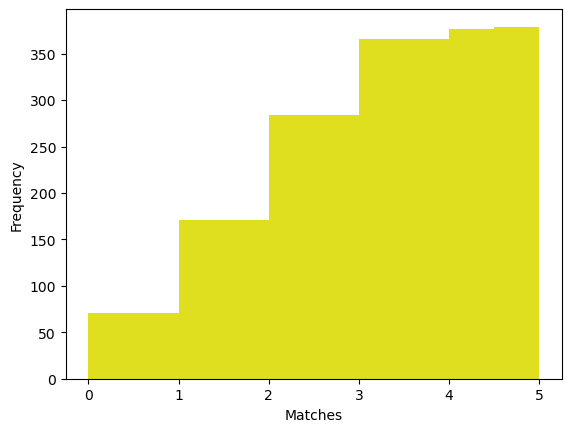

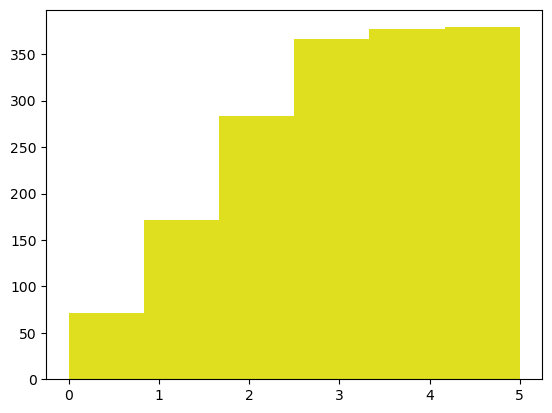

In [41]:
plt.hist(merged_top5['matches'],color='#dfdf20', cumulative=True)
plt.xlabel('Matches')
plt.ylabel('Frequency')
plt.show()
res = plt.hist(merged_top5['matches'], bins=6,color='#dfdf20', cumulative=True)


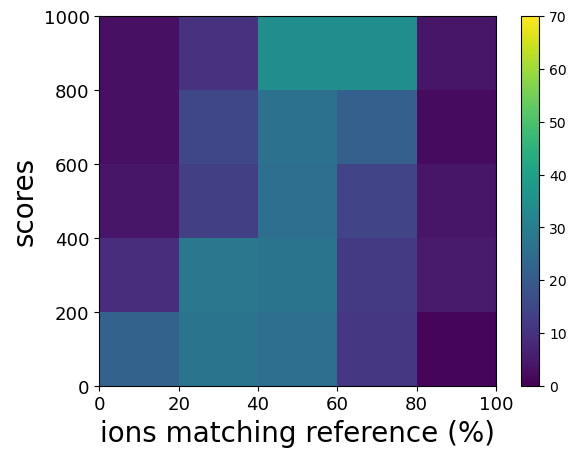

In [39]:
plt.hist2d(matches_normalized * 100, merged['scores'] * 1000, bins=(5, 5), range=[[0, 100], [0, 1000]])
plt.colorbar()
plt.clim(0, 70)
plt.xlabel('ions matching reference (%)', fontsize=20)
plt.ylabel('scores', fontsize=20)
plt.tick_params(labelsize=13)
plt.show()

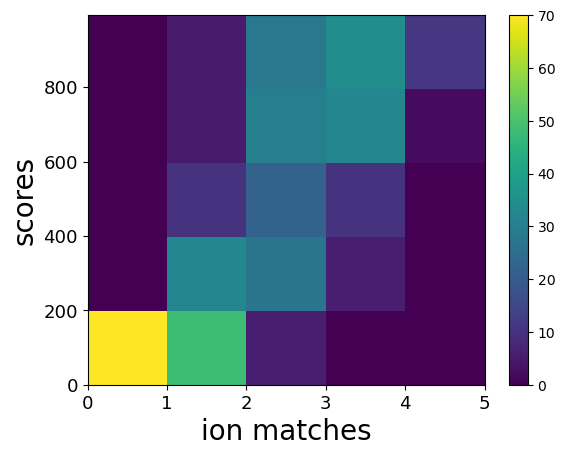

In [40]:
plt.hist2d(merged_top5['matches'], merged_top5['scores'] * 1000, bins=([0,1,2,3,4,5], 5))
plt.colorbar()
plt.clim(0, 70)

plt.xlabel('ion matches', fontsize=20)
plt.ylabel('scores', fontsize=20)
plt.tick_params(labelsize=13)
plt.show()

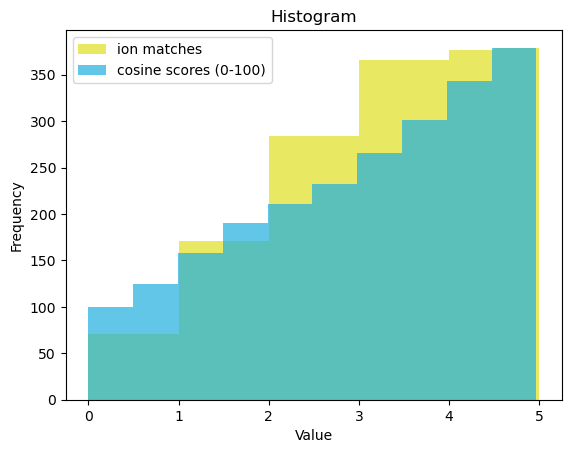

In [27]:
plt.hist(merged_top5['matches'], color='#dfdf20', alpha=0.7, label='ion matches', cumulative=True)

# Plot histogram of scores
plt.hist(merged_top5['scores'] * 5, color='#20afdf', alpha=0.7, label='cosine scores (0-100)', cumulative=True)

plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram')
plt.legend()
plt.show()